## Team allocation feasability.

#### In this notebook we investgate the computationally intensive algoirithm for assinging workers to projects. i.e. Is it practical to find the global optimimum solution for team allocation?

#### First we simply want to know how many possible teams are there for a given project?

We make the following assumptions/simplifications:
- P=20 projects are created at timestep t
- W=450 workers are already actively engaged in projects at t
- All combinations of teams need to be assembled and have their probability of success calculated*

\*In practice the computation is reduced because: 1) workers with OVR < 2xproject risk cannot participate; 2) teams that exceed project budget do not need to have probability of success calculated because they cannot be afforded; 3)...**other simplifications?**  

In [38]:
from itertools import combinations 
import matplotlib.pyplot as plt
import operator as op
from functools import reduce
import time

%matplotlib inline

In [13]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom 

#### If there are 450 workers engaged in projects at time t, then lets say there are 550 workers free to be allocated to project p. This gives us the following combinatorial numbers of teams:

In [25]:
free_workers = 550

for team_size in [3,4,5,6,7]:
    
    team_count = ncr(550, team_size)
    print("%d teams of %d workers" % (team_count, team_size))

27578100 teams of 3 workers
3771305175 teams of 4 workers
411826525110 teams of 5 workers
37407576030825 teams of 6 workers
2907103051538400 teams of 7 workers


#### Next we create all these possible combinations of teams and loop through these combinations. In practice we would have to do this in order to evaluate the success probability of each team. We count how long this takes for each team size:

In [37]:
print("At timestep t there are:")

for team_size in [1,2,3,4,5,6,7]:
    
    start = time.time()
    comb = combinations(range(550), team_size)
    
    team_count = 0
    for i in comb:
        team_count +=1
        
    end = time.time()
    
    print("%d teams of %d workers (calculation took %.3f minutes)" 
          % (team_count, team_size, (end-start)/60))

At timestep t there are:
550 teams of 1 workers (calculation took 0.000 minutes)
150975 teams of 2 workers (calculation took 0.001 minutes)
27578100 teams of 3 workers (calculation took 0.076 minutes)
3771305175 teams of 4 workers (calculation took 11.352 minutes)


KeyboardInterrupt: 

#### The next loop for team_size=5 is going to take approx 20 hours so we stop the interupt the calculation.

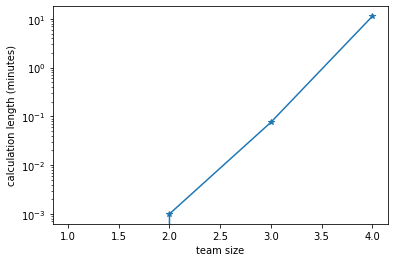

In [45]:
plt.plot([1,2,3,4], [0.0, 0.001, 0.076, 11.352], '-*')
plt.ylabel('calculation length (minutes)')
plt.xlabel('team size')
plt.yscale('log');

#### As expected this is a combinatorial explosion that makes it impractical if not impossible to find the gloabl optimum of success probability from all possible teams. It looks as if it would take decades for each timestep of the simulation if we tried to do this* 

\*On a better computer with numerical optimisation and parallel processing this could be reduced but is still going to be impractical.   